In [48]:
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib

import seaborn as sns
import sys
import scipy.io as sio
import h5py

sys.path.append('/mlodata1/lugeon/eeg_project/scripts')

sns.set_context("paper")
sns.set(font_scale = 1.6)
sns.set_style("white", {
    "font.family": "sans-serif",
    "font.serif": ['Helvetica'],
    "font.scale": 2
})
sns.set_style("ticks", {"xtick.major.size": 4,
                        "ytick.major.size": 4})

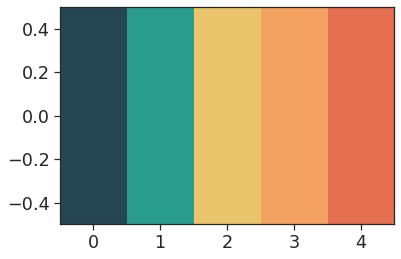

In [3]:
from matplotlib import colors
palette = ['#264653', '#2A9D8F','#E9C46A', '#F4A261', '#E76F51']
cmap = colors.ListedColormap(palette)

plt.imshow(np.arange(len(palette)).reshape(1, -1), aspect='auto', cmap=cmap,origin="lower")
plt.show()

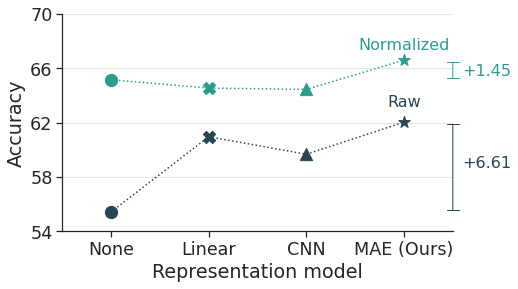

In [169]:
models = ['None', 'Linear', 'CNN', 'MAE (Ours)']
markers = ['o', 'X', '^', '*']

x = np.arange(len(models))

raw_accuracy = [55.42, 60.96, 59.67, 62.03]


norm_accuracy = [65.15, 64.54, 64.44, 66.60]

fig, ax = plt.subplots(figsize=(7, 4))

for i, model in enumerate(models):
    ax.scatter(x[i], raw_accuracy[i], marker=markers[i], color=cmap(0), s=150)
    ax.scatter(x[i], norm_accuracy[i], marker=markers[i], color=cmap(1), s=150)
    
ax.plot(x, raw_accuracy, ls=':', color=cmap(0), label='Raw')
ax.plot(x, norm_accuracy, ls=':', color=cmap(1), label='Normed')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False) 

ax.set_ylim([54, 68])
ax.set_xlim([-0.5, 3.5])

ax.set_yticks([54, 58, 62, 66, 70])
for tick in ax.get_yticks():
    ax.axhline(y=tick, color='black', lw=1, zorder=0, alpha=0.1)

ax.set_xticks(x)
ax.set_xticklabels(models)

ax.set_ylabel('Accuracy')

    
plt.text(3, 67.7, 'Normalized', color=cmap(1), va='center', ha='center', fontsize=16)
plt.text(3, 63.5, 'Raw', color=cmap(0), va='center', ha='center', fontsize=16)


ax.annotate(text='', xy=(3.5, 55.42), xytext=(3.5, 62.03), 
            xycoords='data', textcoords='data',
            arrowprops=dict(arrowstyle='|-|', 
                            lw=1, 
                            color=cmap(0),
                            mutation_scale=6))

ax.text(3.6, 59, '+6.61', va='center', fontsize=16, color=cmap(0))

ax.annotate(text='', xy=(3.5, 65.15), xytext=(3.5, 66.60), 
            xycoords='data', textcoords='data',
            arrowprops=dict(arrowstyle='|-|', 
                            lw=1, 
                            color=cmap(1),
                            mutation_scale=6))

ax.text(3.6, 65.8, '+1.45', va='center', fontsize=16, color=cmap(1))

ax.set_xlabel('Representation model')


plt.savefig('img/raw_vs_norm_dream.pdf', bbox_inches='tight')

plt.show()

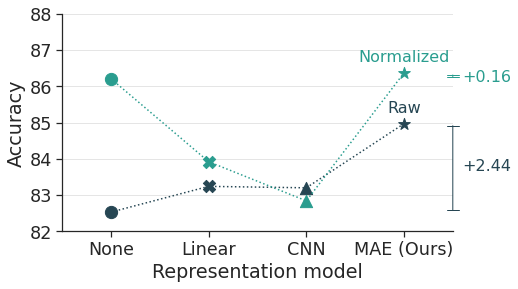

In [170]:
models = ['None', 'Linear', 'CNN', 'MAE (Ours)']
markers = ['o', 'X', '^', '*']

x = np.arange(len(models))

raw_accuracy = [82.53, 83.24, 83.20, 84.97]
norm_accuracy = [86.21, 83.92, 82.84, 86.37]

fig, ax = plt.subplots(figsize=(7, 4))

for i, model in enumerate(models):
    ax.scatter(x[i], raw_accuracy[i], marker=markers[i], color=cmap(0), s=150)
    ax.scatter(x[i], norm_accuracy[i], marker=markers[i], color=cmap(1), s=150)
    
ax.plot(x, raw_accuracy, ls=':', color=cmap(0), label='Raw')
ax.plot(x, norm_accuracy, ls=':', color=cmap(1), label='Normalized')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False) 

ax.set_ylim([82, 88])
ax.set_xlim([-0.5, 3.5])

for tick in ax.get_yticks():
    ax.axhline(y=tick, color='black', lw=1, zorder=0, alpha=0.1)

ax.set_xticks(x)
ax.set_xticklabels(models)

ax.set_ylabel('Accuracy')

    
plt.text(3, 86.8, 'Normalized', color=cmap(1), va='center', ha='center', fontsize=16)
plt.text(3, 85.4, 'Raw', color=cmap(0), va='center', ha='center', fontsize=16)

ax.annotate(text='', xy=(3.5, 82.53), xytext=(3.5, 84.97), 
            xycoords='data', textcoords='data',
            arrowprops=dict(arrowstyle='|-|', 
                            lw=1, 
                            color=cmap(0),
                            mutation_scale=6))

ax.text(3.6, 83.8, '+2.44', va='center', fontsize=16, color=cmap(0))

ax.annotate(text='', xy=(3.5, 86.21), xytext=(3.5, 86.37), 
            xycoords='data', textcoords='data',
            arrowprops=dict(arrowstyle='|-|', 
                            lw=1, 
                            color=cmap(1),
                            mutation_scale=6))

ax.text(3.6, 86.25, '+0.16', va='center', fontsize=16, color=cmap(1))

ax.set_xlabel('Representation model')

plt.savefig('img/raw_vs_norm_stage.pdf', bbox_inches='tight')

plt.show()